In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("C:/Users/ponta/Downloads/all")
df = pd.read_csv("train.csv")


df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
df = pd.read_csv("train.csv").replace("male",0).replace("female",1)
df = df.replace("C",0).replace("Q",1).replace("S",2)

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

([array([13.,  5., 11., 16., 52., 62., 55., 49., 38., 28., 23., 23., 15.,
          9.,  8.,  7.,  4.,  5.,  1.,  0.]),
  array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
         16., 13., 11.,  4.,  5.,  1.,  1.])],
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 2 Lists of Patches objects>)

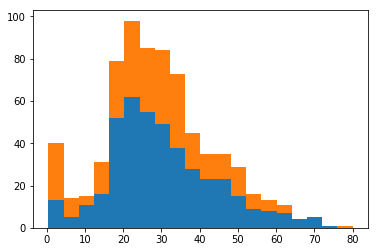

In [5]:
#ヒストグラムでも作ってみるべ
split_data=[]
for survive in [0,1]:
    split_data.append(df[df.Survived==survive])
#df.Survivedとsurviveの値が一致したものだけが追加されていく

hist = [i["Age"].dropna() for i in split_data]
#分けられたデータセットの中で年齢の列だけ取り出して欠損値を抜く
plt.hist(hist,histtype="barstacked",bins=20)


#年齢別にみるとお年寄りが結構死んでる

In [49]:
#とりま使えそうなデータを選別する
#新しい特徴量の追加
df["Family"] = df["SibSp"] + df["Parch"] + 1
combine = [df]
for train in combine:
    train["Title"] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
    
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess','Capt', 
                                                 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Ms', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
   
#特徴量の削除
df_2 = df.drop(["Name","SibSp","Parch","Ticket","Cabin"],axis=1)
df_2["Age"] = df_2["Age"].fillna(df_2["Age"].mean())
df_2["Embarked"] = df_2["Embarked"].fillna("S")
df_2 = df_2.replace("C",0).replace("Q",1).replace("S",2)
df_3 = df_2

#sklearn用にデータ整形
X_train, y_train= df_3.values[:,2:], df_3.values[:,1]

df_3
#df_3.isnull().sum()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,1,0,3,0,22.000000,7.2500,2.0,2,1.0
1,2,1,1,1,38.000000,71.2833,0.0,2,3.0
2,3,1,3,1,26.000000,7.9250,2.0,1,2.0
3,4,1,1,1,35.000000,53.1000,2.0,2,3.0
4,5,0,3,0,35.000000,8.0500,2.0,1,1.0
5,6,0,3,0,29.699118,8.4583,1.0,1,1.0
6,7,0,1,0,54.000000,51.8625,2.0,1,1.0
7,8,0,3,0,2.000000,21.0750,2.0,5,4.0
8,9,1,3,1,27.000000,11.1333,2.0,3,3.0
9,10,1,2,1,14.000000,30.0708,0.0,2,3.0


In [85]:
#SVMパイプラインの作成(単純なSVM.ver)
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(SVC(kernel='rbf',gamma=0.01, C=100.0, random_state=1))
pipe_lr.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('svc', SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
#パラメーターの最適化(単純なSVMの最適.ver)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [18]:
#adaboostの導入
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
ada_train = accuracy_score(y_train, y_train_pred) 
print('AdaBoost train %.3f'
      % (ada_train))

AdaBoost train 0.837


In [39]:
#ランダムフォレストの導入　
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion="gini", n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train,y_train)
f_pred = forest.predict(X_test)
f_pred = f_pred.astype(np.int64)

# PassengerId
PassengerId = np.array(df_test3["PassengerId"]).astype(np.int)
result = pd.DataFrame(f_pred, PassengerId, columns = ["Survived"])
# csvとして書き出し
result.to_csv("result_random.csv", index_label = ["PassengerId"])
df_f = pd.read_csv("result_random.csv")
df_f

forest.score(X_train,y_train)

0.9842873176206509

In [50]:
#アンサンブルしてみっか
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [51]:
#logistic, random forest, k-neighbor, SVMというてんこ盛り仕様
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clf1 = LogisticRegression(penalty='l2', 
                          C=10.0,
                          random_state=1)

clf2 =RandomForestClassifier(criterion="gini",
                             n_estimators=100,
                             random_state=1, n_jobs=2)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

clf4 = SVC(kernel='rbf',
           gamma=0.1,
           C=10.0, random_state=1,probability=True)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])

clf_labels = ['Logistic regression', 'Random Forest', 'KNN', 'SVM']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, pipe4], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.86 (+/- 0.03) [Logistic regression]
ROC AUC: 0.86 (+/- 0.05) [Random Forest]
ROC AUC: 0.84 (+/- 0.06) [SVM]


In [52]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3, pipe4])

clf_labels = ['Logistic regression', 'Random Forest', 'KNN', 'SVM','Majority voting']
all_clf = [pipe1, clf2, pipe3, pipe4, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    


ROC AUC: 0.86 (+/- 0.03) [Logistic regression]
ROC AUC: 0.86 (+/- 0.05) [Random Forest]
ROC AUC: 0.84 (+/- 0.06) [SVM]
ROC AUC: 0.87 (+/- 0.04) [Majority voting]


In [23]:
#パラメーターの調整するべ
from sklearn.model_selection import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline-1__clf__C': [0.001, 0.01, 1.0, 10.0,100.0],
          'pipeline-3__clf__C': [0.001, 0.01, 1.0, 10.0 ,100.0],
          'pipeline-3__clf__gamma': [0.001,0.01,1.0,10.0,100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))


print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)    

0.853 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.001, 'pipeline-3__clf__gamma': 0.001}
0.856 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.001, 'pipeline-3__clf__gamma': 0.01}
0.844 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.001, 'pipeline-3__clf__gamma': 1.0}
0.830 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.001, 'pipeline-3__clf__gamma': 10.0}
0.827 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.001, 'pipeline-3__clf__gamma': 100.0}
0.854 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.01, 'pipeline-3__clf__gamma': 0.001}
0.856 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__C': 0.01, 'pipeline-

In [183]:
mv_clf.get_params()

{'pipeline-1': Pipeline(memory=None,
      steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)]]),
 'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'pipeline-2': Pipeline(memory=None,
      steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ['clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=No

In [56]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
predict = xgb_model.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [53]:
#テストデータを作る
os.chdir("C:/Users/ponta/Downloads/all")
df = pd.read_csv("test.csv")

#データの整形
df_test = pd.read_csv("test.csv").replace("male",0).replace("female",1)
df_test = df_test.replace("C",0).replace("Q",1).replace("S",2)
df_test["Family"] = df_test["SibSp"] + df_test["Parch"] + 1
combine = [df_test]
for train in combine:
    train["Title"] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
    
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess','Capt', 
                                                 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Ms', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


df_test2 = df_test.drop(["Name","SibSp","Parch","Ticket","Cabin"],axis=1)
df_test2["Age"] = df_test2["Age"].fillna(df_test2["Age"].mean())
df_test2["Embarked"] = df_test2["Embarked"].fillna("S")
df_test2 = df_test2.replace("C",0).replace("Q",1).replace("S",2)
df_test2["Fare"] = df_test2["Fare"].fillna(df_test2["Fare"].mean())
df_test3 = df_test2

X_test= df_test3.values[:,1:]

df_test3

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,892,3,0,34.50000,7.8292,1,1,1.0
1,893,3,1,47.00000,7.0000,2,2,3.0
2,894,2,0,62.00000,9.6875,1,1,1.0
3,895,3,0,27.00000,8.6625,2,1,1.0
4,896,3,1,22.00000,12.2875,2,3,3.0
5,897,3,0,14.00000,9.2250,2,1,1.0
6,898,3,1,30.00000,7.6292,1,1,2.0
7,899,2,0,26.00000,29.0000,2,3,1.0
8,900,3,1,18.00000,7.2292,0,1,3.0
9,901,3,0,21.00000,24.1500,2,3,1.0


In [87]:
import numpy as np
#予測してみるべ
y_pred = pipe_lr.predict(X_test)
y_pred.dtype
#結果の出力
y_pred = y_pred.astype(np.int64)

print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [54]:
#アンサンブルの結果予測してみるべ
for clf, label in zip(all_clf,clf_labels):
    y_predA = clf.fit(X_train, y_train).predict(X_test)

y_predA
y_predA = y_predA.astype(np.int64)

# PassengerId
PassengerId = np.array(df_test3["PassengerId"]).astype(np.int)
result = pd.DataFrame(y_predA, PassengerId, columns = ["Survived"])
# csvとして書き出し
result.to_csv("result_ensemble_title.csv", index_label = ["PassengerId"])

C:\Users\ponta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
df_A = pd.read_csv("result_ensemble_title.csv")
df_A

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [102]:
# PassengerId
PassengerId = np.array(df_test3["PassengerId"]).astype(np.int)
result = pd.DataFrame(y_pred, PassengerId, columns = ["Survived"])
# csvとして書き出し
result.to_csv("result_svm_rbf.csv", index_label = ["PassengerId"])

,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0


In [78]:
df_r = pd.read_csv("result_svm_rbf.csv")

In [74]:
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [79]:
df_r

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
